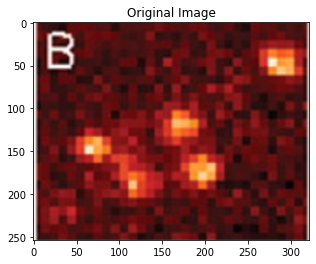

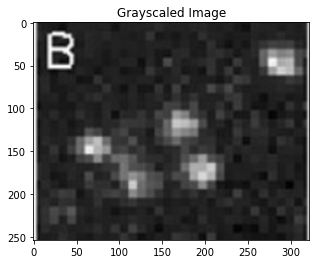

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from scipy import optimize 

cmap = 'hot'

img = Image.open('palm.png')
plt.imshow(img)
plt.title('Original Image')
plt.show()

##Converting image to grayscale
img = img.convert ('L') 
imgarray = np.asarray(img)
H = imgarray/255
plt.imshow(H, cmap='gray')
plt.title('Grayscaled Image')
plt.show()


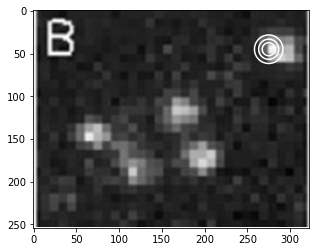

[ 7.06825939e-01  2.89410716e+02  4.78853883e+01  1.40053994e+01
  9.58848117e+00 -3.37383800e-01  1.96799814e-01]


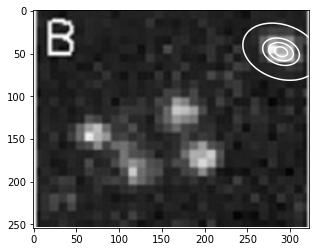

In [6]:
ny,nx = H.shape
# Create x and y indices
x = np.linspace(0, nx, nx)
y = np.linspace(0, ny, ny)

X, Y = np.meshgrid(x,y)
#define 2d gaussian function and pass independant variables x and y as a list
def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()
#create guess
guess0 = (1, 275, 45, 10, 10, 0, 0)
# plot twoD_Gaussian data generated above (using guess)
fig, ax = plt.subplots()
ax.imshow(H, cmap='gray')
pk0 = twoD_Gaussian((X,Y), *guess0)
ax.contour(x, y, pk0.reshape(ny, nx), 3, colors='w')
plt.show()
#try to fit the guess beforehand
popt, pcov = optimize.curve_fit(twoD_Gaussian, (X,Y), H.ravel(), p0=guess0)
pk0 = twoD_Gaussian((X,Y), *popt)
print(popt)

fig, ax = plt.subplots()
ax.imshow(H, cmap='gray')
ax.contour(x, y, pk0.reshape(ny, nx), 3, colors='w')
plt.show()



[  0.59374293 173.11746911 119.71079527  10.85584366  12.17857373
   1.66971052   0.19799864]


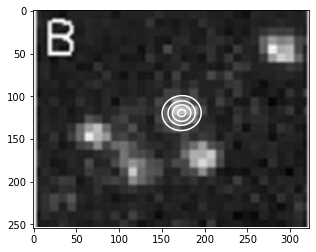

In [14]:
guess1 = (0.7, 170, 120, 20, 20, 0, 0)
popt, pcov = optimize.curve_fit(twoD_Gaussian, (X,Y), H.ravel(), p0=guess1)
pk1 = twoD_Gaussian((X,Y), *popt)
print(popt)

fig, ax = plt.subplots()
ax.imshow(H, cmap='gray')
ax.contour(x, y, pk1.reshape(ny, nx), 3, colors='w')
plt.show()



[ 6.96123960e-01  1.97479117e+02  1.73375754e+02  1.19742981e+01
  1.09538051e+01 -1.24048031e-01  1.97021573e-01]


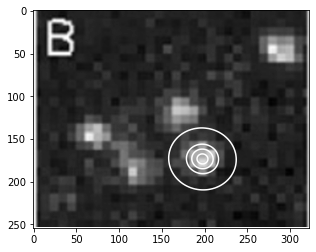

In [15]:
guess2 = (0.8, 200, 170, 20, 20, 0, 0)
popt, pcov = optimize.curve_fit(twoD_Gaussian, (X,Y), H.ravel(), p0=guess2)
pk2 = twoD_Gaussian((X,Y), *popt)
print(popt)

fig, ax = plt.subplots()
ax.imshow(H, cmap='gray')
ax.contour(x, y, pk2.reshape(ny, nx), 3, colors='w')
plt.show()


[  0.67585899  71.72512452 146.10175479  12.33059388   8.86405843
   2.96248377   0.19835162]


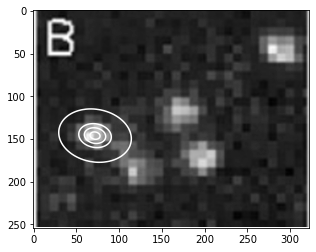

In [16]:
guess3 = (0.8, 55, 150, 5, 5, 0, 0)
popt, pcov = optimize.curve_fit(twoD_Gaussian, (X,Y), H.ravel(), p0=guess3)
pk3 = twoD_Gaussian((X,Y), *popt)
print(popt)

fig, ax = plt.subplots()
ax.imshow(H, cmap='gray')
ax.contour(x, y, pk3.reshape(ny, nx), 3, colors='w')
plt.show()


[  0.3801961   91.98507968 160.77566011  36.07176955  10.08218212
   2.49139503   0.19344778]


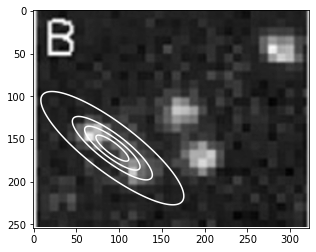

In [18]:
guess4 = (0.7 , 120, 190, 5, 5, 0, 0)
popt, pcov = optimize.curve_fit(twoD_Gaussian, (X,Y), H.ravel(), p0=guess4)
pk4 = twoD_Gaussian((X,Y), *popt)
print(popt)

fig, ax = plt.subplots()
ax.imshow(H, cmap='gray')
ax.contour(x, y, pk4.reshape(ny, nx), 3, colors='w')
plt.show()


(-0.5, 321.5, 253.5, -0.5)

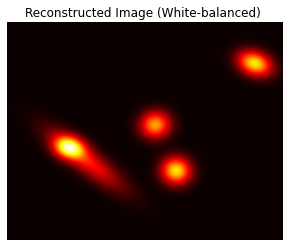

In [26]:
finalpks = (pk0 + pk1 + pk2 + pk3 +pk4)/5
finalpks = finalpks.reshape(ny,nx)

### white-balance
finalpks = (finalpks - np.min(finalpks))/(np.max(finalpks)-np.min(finalpks))

plt.figure()
plt.imshow(finalpks, cmap=cmap, vmin=0, vmax=1)
plt.title('Reconstructed Image (White-balanced) ')
plt.axis('off')





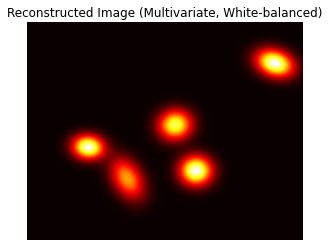

In [7]:
def multivariate(xy, *allG):
    x, y = xy
    G = np.zeros((ny,nx))
    allG = np.asarray(allG)
    allGuesses = allG.reshape((5,7))
    amplitudeL = allGuesses[:,0]
    xoL = allGuesses[:,1]
    yoL = allGuesses[:,2]
    sigma_xL = allGuesses[:,3]
    sigma_yL = allGuesses[:,4]
    thetaL = allGuesses[:,5]
    offsetL = allGuesses[:,6]
    for index in range(5):
        amplitude = amplitudeL[index]
        xo = xoL[index]
        yo = yoL[index]
        sigma_x = sigma_xL[index]
        sigma_y = sigma_yL[index]
        theta = thetaL[index]
        offset = offsetL[index]
        a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
        b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
        c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
        g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
        G += g
    G/=5
    return G.ravel()

guess0 = (1, 275, 45, 10, 10, 0, 0)
guess1 = (0.7, 170, 120, 20, 20, 0, 0)
guess2 = (0.8, 200, 170, 20, 20, 0, 0)
guess3 = (0.8, 55, 150, 5, 5, 0, 0)
guess4 = (0.7, 120, 190, 5, 5, 0, 0)
allGuesses = np.asarray((guess0, guess1, guess2, guess3, guess4)).ravel()


guessAll = (list(allGuesses))
popt, pcov = optimize.curve_fit(multivariate, (X,Y), H.ravel(), p0=guessAll)
pkall = multivariate((X,Y), *popt)


finalpkall = (pkall - np.min(pkall))/(np.max(pkall)-np.min(pkall))

fig, ax = plt.subplots()
plt.imshow(finalpkall.reshape(ny,nx), cmap=cmap, vmin=0, vmax=1)
plt.title('Reconstructed Image (Multivariate, White-balanced)')
plt.axis('off')
plt.show()